In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from visualization import *
from core.file import NuMLFile
from IPython.display import clear_output

In [3]:
fname = "/data/uboone/uboone_numu_slice_seq.h5"

In [4]:
"""Process all events in a file into graphs"""
f = NuMLFile(fname)
f.add_group("hit_table")
f.add_group("particle_table", ["g4_id", "parent_id", "type", "momentum", "start_process", "end_process"])
f.add_group("edep_table")
f.add_group("spacepoint_table")
f.read_data([0], [1000], use_seq=True, profile=False)
evt_list = f.build_evt(0, 1000)

In [ ]:
# Process single key
# planes = single_plane_graph_vis(evt_list[0])
# plot_event(handle_planes(planes), print_out=True, write=False)

In [6]:
print(evt_list[0]['particle_table'])

     g4_id  parent_id  type  momentum        start_process  \
0        1          0    13  0.735918           b'primary'   
1        2          0  2212  0.905348           b'primary'   
2        3          2    11  0.001023             b'hIoni'   
3        4          2    11  0.000673             b'hIoni'   
4        5          2    11  0.000816             b'hIoni'   
..     ...        ...   ...       ...                  ...   
99     169        147    11  0.000261              b'phot'   
100    180        145    11  0.000131              b'phot'   
101    181        144    11  0.000185              b'phot'   
102    182        141    11  0.000142              b'phot'   
103    233         15  2112  0.020334  b'neutronInelastic'   

                  end_process  
0        b'FastScintillation'  
1          b'protonInelastic'  
2        b'FastScintillation'  
3        b'FastScintillation'  
4        b'FastScintillation'  
..                        ...  
99       b'FastScintillation'  

In [7]:
current_event = evt_list[3]
# print(current_event)
planes = single_plane_graph_vis(current_event)
particle = current_event['particle_table']
hier = extract_hierarchy(planes, particle)
print(hier) # 3 different tables, why?

func:'panoptic_label' took: 0.4058 sec
[       type  momentum  hit_count  neighbors
0       NaN       NaN          0  [1, 5, 4]
1      13.0  1.102505         48  [108, 95]
5    2212.0  0.607284          2         []
4     211.0  0.232898          1         []
108    11.0  0.002462          1         []
95     11.0  0.002393          1         [],              type  momentum  hit_count  \
0             NaN       NaN          0   
1    1.300000e+01  1.102505        436   
5    2.212000e+03  0.607284         38   
3    2.212000e+03  0.307925          3   
4    2.110000e+02  0.232898         79   
121  1.100000e+01  0.003570          1   
113  1.100000e+01  0.001766          1   
108  1.100000e+01  0.002462          2   
104  1.100000e+01  0.002568          1   
95   1.100000e+01  0.002393          2   
94   1.100000e+01  0.001936          1   
89   1.100000e+01  0.006528          3   
87   1.100000e+01  0.005578          3   
82   1.100000e+01  0.002529          1   
80   1.100000e+01  0.

In [22]:
# Starting code for finding the particle hierarchy, assuming the above code works

# for each particle (given by g4_id), we have a list of their neighbors/children
# given in the form of hierarchy.iloc[g4_id]['neighbors']

# iterate through each particle and its children and create a big list of all the directed edges?
# seems inefficient...?

import networkx as nx
import matplotlib.pyplot as plt
def vis_hierarchy(hier_df):
    ''' Visualize the tree hierarchy of a particle event '''
    # make a list of all the edges
    edges = []
    for particle in hier_df.index.values:
        if hier_df.iloc[particle]['neighbors'] == []: 
            break
        else:
            for neighbor in hier_df.iloc[particle]['neighbors']:
                edges.append((particle, neighbor))
    
    # turn this list into a networkx graph and visualize
    G = nx.DiGraph()
    G.add_edges_from(edges)
    
    plt.figure()
    nx.draw_networkx(G)
    plt.show()

/tmp/ipykernel_17683/3118650667.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if hier_df.iloc[particle]['neighbors'] == []:


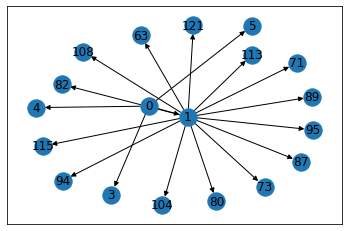

In [31]:
# Test function
current_event = evt_list[9]
test=hier[1]
vis_hierarchy(test)

In [32]:
# Below is old code for figuring out function

In [51]:
table1 = hier[0]
table1.index.values.tolist()
# vis_hierarchy(table_1)

[0, 1, 5, 4, 108, 95]

/tmp/ipykernel_6779/3386597217.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if table1.iloc[particle]['neighbors'] == []:


[(0, 1), (0, 5), (0, 4), (1, 108), (1, 95)]
DiGraph with 6 nodes and 5 edges


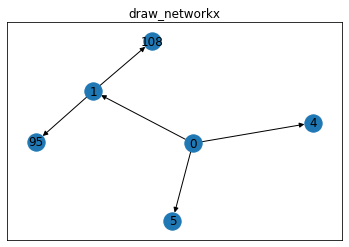

In [73]:
particles = table1.index.values #.tolist()
# table1.iloc[5]['neighbors']

edges = []
for particle in particles:
#     print(table1.iloc[particle]['neighbors'])
    if table1.iloc[particle]['neighbors'] == []: 
        break
    else:
#         print(table1.iloc[particle]['neighbors'])
        for neighbor in table1.iloc[particle]['neighbors']:
            edges.append((particle, neighbor))

print(edges)

G = nx.DiGraph() # or G = nx.DiGraph()
G.add_edges_from(edges)
print(G)

plt.title("draw_networkx")
nx.draw_networkx(G)

plt.show()

In [72]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
nx.nx_agraph.write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.title('draw_networkx')
pos=graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=False, arrows=False)
# plt.savefig('nx_test.png')

ImportError: requires pygraphviz http://pygraphviz.github.io/